# k-Nearest Neighbors

## k-Neighbors classification

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


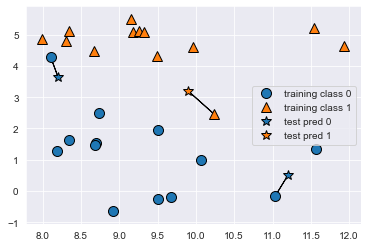

In [31]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np

mglearn.plots.plot_knn_classification(n_neighbors=1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


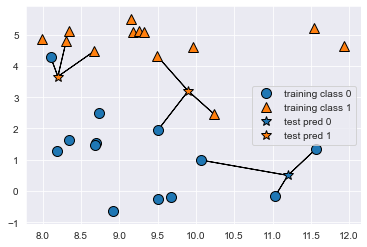

In [32]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [33]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print(f'Test set predictions: {clf.predict(X_test)}')
print(f'Test set accuracy: {clf.score(X_test, y_test):.2f}')

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


## Analyzing KNeighborsClassifier

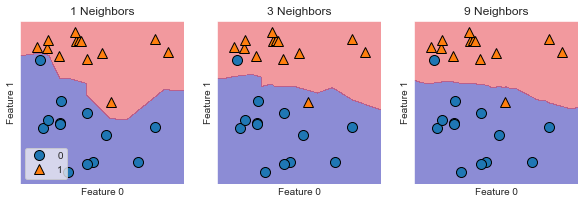

In [40]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f'{n_neighbors} Neighbors')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend(loc=3)
plt.show()

## k-Neighbors classification

In [70]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f'cancer.keys():\n{cancer.keys()}')
print(f'Shape of cancer data: {cancer.data.shape}')
# print(f'Sample counts per class:\n{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target)}')    # Why doesn't this work with f-strings?
print('Sample counts per class:\n{}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print(f'Target names:\n{cancer.target_names}')
print(f'Feature names:\n{cancer.feature_names}')

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Target names:
['malignant' 'benign']
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [38]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

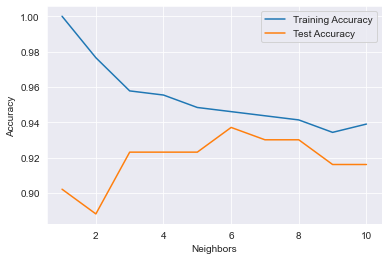

In [42]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Neighbors')
plt.legend()
plt.show()

## k-Neighbors regression

In [63]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)
print(f'Test set predictions:\n{reg.predict(X_test)}')
print(f'Test set R^2: {reg.score(X_test,y_test):.2f}')

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


## Analyzing K-Neighbors regressor

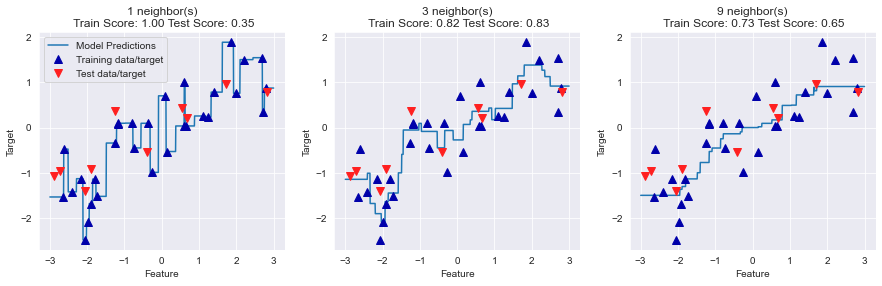

In [68]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
# create 1000 data points evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions with 1, 3, and 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        '{} neighbor(s)\n Train Score: {:.2f} Test Score: {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test))
    )
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model Predictions', 'Training data/target', 'Test data/target'], loc='best')
plt.show()